<a href="https://colab.research.google.com/github/122BT0251/EDA-Analysis-of-Green-destination-employees-attrition-rate/blob/main/Green_Destination_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split , RandomizedSearchCV , cross_val_score
from sklearn.linear_model import LogisticRegression , RidgeClassifier , SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier , AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score , confusion_matrix


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
pd.set_option('display.max_columns' , None)

In [55]:
df = pd.read_csv('/content/greendestination (1) (1).csv')

In [ ]:
df.shape

(1470, 35)

In [ ]:
df.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1151,28,No,Travel_Rarely,580,Research & Development,27,3,Medical,1,1622,2,Female,39,1,2,Manufacturing Director,1,Divorced,4877,20460,0,Y,No,21,4,2,80,1,6,5,2,5,3,0,0
201,49,No,Non-Travel,1002,Research & Development,18,4,Life Sciences,1,275,4,Male,92,3,2,Manufacturing Director,4,Divorced,6804,23793,1,Y,Yes,15,3,1,80,2,7,0,3,7,7,1,7
347,47,No,Travel_Frequently,1309,Sales,4,1,Medical,1,467,2,Male,99,3,2,Sales Representative,3,Single,2976,25751,3,Y,No,19,3,1,80,0,5,3,3,0,0,0,0
1402,31,No,Travel_Rarely,1276,Research & Development,2,1,Medical,1,1974,4,Female,59,1,1,Laboratory Technician,4,Divorced,1129,17536,1,Y,Yes,11,3,3,80,3,1,4,3,1,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Y,Yes,14,3,2,80,0,6,4,3,4,2,0,3
1249,29,Yes,Travel_Rarely,428,Sales,9,3,Marketing,1,1752,2,Female,52,1,1,Sales Representative,2,Single,2760,14630,1,Y,No,13,3,3,80,0,2,3,3,2,2,2,2
880,32,No,Travel_Frequently,116,Research & Development,13,3,Other,1,1234,3,Female,77,2,1,Laboratory Technician,2,Married,2743,7331,1,Y,No,20,4,3,80,1,2,2,3,2,2,2,2
1033,31,Yes,Travel_Frequently,1445,Research & Development,1,5,Life Sciences,1,1459,3,Female,100,4,3,Manufacturing Director,2,Single,7446,8931,1,Y,No,11,3,1,80,0,10,2,3,10,8,4,7
511,36,No,Travel_Rarely,913,Research & Development,9,2,Medical,1,699,2,Male,48,2,2,Manufacturing Director,2,Divorced,8847,13934,2,Y,Yes,11,3,3,80,1,13,2,3,3,2,0,2
1365,29,Yes,Travel_Frequently,746,Sales,24,3,Technical Degree,1,1928,3,Male,45,4,1,Sales Representative,1,Single,1091,10642,1,Y,No,17,3,4,80,0,1,3,3,1,0,0,0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.00,36.92,9.14,18.00,30.00,36.00,43.00,60.00
DailyRate,1470.00,802.49,403.51,102.00,465.00,802.00,1157.00,1499.00
DistanceFromHome,1470.00,9.19,8.11,1.00,2.00,7.00,14.00,29.00
Education,1470.00,2.91,1.02,1.00,2.00,3.00,4.00,5.00
EmployeeCount,1470.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
EmployeeNumber,1470.00,1024.87,602.02,1.00,491.25,1020.50,1555.75,2068.00
EnvironmentSatisfaction,1470.00,2.72,1.09,1.00,2.00,3.00,4.00,4.00
HourlyRate,1470.00,65.89,20.33,30.00,48.00,66.00,83.75,100.00
JobInvolvement,1470.00,2.73,0.71,1.00,2.00,3.00,3.00,4.00
JobLevel,1470.00,2.06,1.11,1.00,1.00,2.00,3.00,5.00


In [ ]:
df.isnull().any().any()

False

In [ ]:
df = df.drop('EmployeeCount' , axis = 1)
df = df.drop('StandardHours' , axis = 1)

In [ ]:
categorical_cols = [feature for feature in df.columns if df[feature].dtype == 'object']
df[categorical_cols].sample(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
445,No,Travel_Rarely,Sales,Life Sciences,Female,Manager,Single,Y,No
280,No,Travel_Rarely,Research & Development,Medical,Male,Research Director,Married,Y,Yes
1224,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
278,No,Travel_Frequently,Research & Development,Life Sciences,Female,Manufacturing Director,Divorced,Y,No
916,No,Travel_Rarely,Sales,Marketing,Female,Manager,Married,Y,No


In [77]:
cols =['BusinessTravel' , 'Department' , 'EducationField' , 'Gender' , 'JobRole' , 'MaritalStatus' , 'Over18' ]

In [78]:
df = pd.get_dummies(df,columns = cols , drop_first = True)

In [87]:
df.sample(10)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_22.0,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
1328,27,0,728,23,1,1,1864,2,36,2,2,3,3540,7018,1,0,21,4,4,80,1,9,5,3,9,8,5,8,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False
136,51,1,1150,8,4,1,179,1,53,1,3,4,10650,25150,2,0,15,3,4,80,0,18,2,3,4,2,0,3,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True
146,30,0,1427,2,1,1,198,2,35,2,1,4,2720,11162,0,0,13,3,4,80,0,6,3,3,5,3,1,2,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,True
1228,41,0,552,4,3,1,1722,3,60,1,2,2,6430,20794,6,0,19,3,2,80,1,10,4,3,3,2,1,2,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False
1016,31,1,202,8,3,1,1433,1,34,2,1,2,1261,22262,1,0,12,3,3,80,0,1,3,4,1,0,0,0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1183,36,0,1040,3,2,1,1664,4,79,4,2,1,6842,26308,6,0,20,4,1,80,1,13,3,3,5,4,0,4,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1112,38,1,903,2,3,1,1573,3,81,3,2,2,4855,7653,4,0,11,3,1,80,2,7,2,3,5,2,1,4,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False
1356,41,0,337,8,3,1,1909,3,54,3,2,2,4393,26841,5,0,21,4,3,80,1,14,3,3,5,4,1,4,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1102,36,0,1157,2,4,1,1556,3,70,3,1,4,2644,17001,3,1,21,4,4,80,0,7,3,2,3,2,1,2,True,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True
76,35,0,776,1,4,1,100,3,32,2,2,1,4312,23016,0,0,14,3,2,80,0,16,2,3,15,13,2,8,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True


In [ ]:
cols = ['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
scaler = StandardScaler()
for col in cols:
    X_train[col] = scaler.fit_transform(X_train[col].values.reshape(-1 ,1))
    X_test[col] = scaler.fit_transform(X_test[col].values.reshape(-1 ,1))

In [ ]:
lazy = LazyClassifier()
model, pred = lazy.fit(X_train, X_test, y_train, y_test)

100%|██████████| 32/32 [00:03<00:00,  9.86it/s]

[LightGBM] [Info] Number of positive: 198, number of negative: 978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1375
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168367 -> initscore=-1.597243
[LightGBM] [Info] Start training from score -1.597243


In [ ]:
model.sort_values('Accuracy', ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.88,0.63,None,0.86,0.06
CalibratedClassifierCV,0.88,0.57,None,0.85,0.11
SGDClassifier,0.88,0.66,None,0.87,0.09
RidgeClassifierCV,0.88,0.54,None,0.83,0.14
RidgeClassifier,0.88,0.54,None,0.83,0.04
SVC,0.88,0.55,None,0.83,0.09
LinearSVC,0.88,0.59,None,0.85,0.08
ExtraTreesClassifier,0.87,0.53,None,0.82,0.28
LinearDiscriminantAnalysis,0.87,0.63,None,0.86,0.08


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = []
cv_scores = []

In [56]:
df['Attrition'] = df['Attrition'].map({'Yes':1 ,'No':0})


In [57]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [58]:
df['OverTime'] = df['OverTime'].map({'Yes':1 ,'No':0})

In [59]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,0,14,3,4,80,0,17,3,2,9,6,0,8


In [73]:
df['BusinessTravel'] = df['BusinessTravel'].map({'Travel_Rarely':1 ,'Travel_Frequently':2})
df['Department'] = df['Department'].map({'Research & Development':11 ,'Sales':22})

In [91]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = []
cv_scores = []

from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 40, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(
        knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())
error_rate = [1-x for x in cv_scores]

In [93]:
optimal_k = neighbors[error_rate.index(min(error_rate))]
print('The optimal number of neighbors is % d ' % optimal_k)

The optimal number of neighbors is  27 


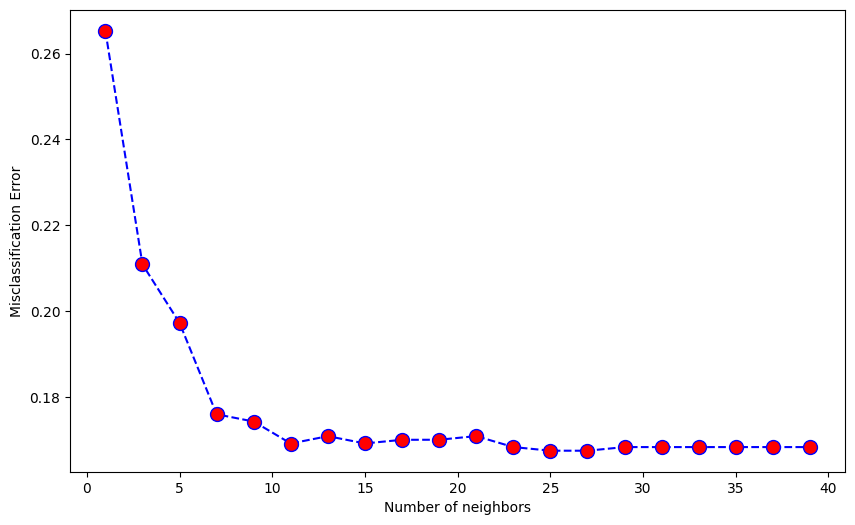

In [94]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40, 2), error_rate, color ='blue', linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

In [61]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [62]:
def print_score(clf, X_train, y_train, X_test, y_test, train = True):
    if train:
        print("Train Result:")
        print("------------")
        print("Classification Report: \n {}\n".format(classification_report(
                y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(
                y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train,
                              cv = 10, scoring ='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        print("accuracy score: {0:.4f}\n".format(accuracy_score(
                y_train, clf.predict(X_train))))
        print("----------------------------------------------------------")

    elif train == False:
        print("Test Result:")
        print("-----------")
        print("Classification Report: \n {}\n".format(
                classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(
                confusion_matrix(y_test, clf.predict(X_test))))
        print("accuracy score: {0:.4f}\n".format(
                accuracy_score(y_test, clf.predict(X_test))))
        print("-----------------------------------------------------------")

In [95]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
print_score(knn, X_train, y_train, X_test, y_test, train = True)
print_score(knn, X_train, y_train, X_test, y_test, train = False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       978
           1       0.71      0.12      0.21       198

    accuracy                           0.84      1176
   macro avg       0.78      0.56      0.56      1176
weighted avg       0.82      0.84      0.79      1176


Confusion Matrix: 
 [[968  10]
 [174  24]]

Average Accuracy: 	 0.8240
Accuracy SD: 		 0.0160
accuracy score: 0.8435

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       255
           1       0.27      0.08      0.12        39

    accuracy                           0.85       294
   macro avg       0.57      0.52      0.52       294
weighted avg       0.79      0.85      0.81       294


Confusion Matrix: 
 [[247   8]
 [ 36   3]]

accuracy score: 0.850

In [64]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True,
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [96]:
rfc = RandomForestClassifier(**rf_params)
rfc.fit(X_train, y_train)
print_score(rfc, X_train, y_train, X_test, y_test, train = True)
print_score(rfc, X_train, y_train, X_test, y_test, train = False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       978
           1       1.00      0.17      0.29       198

    accuracy                           0.86      1176
   macro avg       0.93      0.58      0.60      1176
weighted avg       0.88      0.86      0.82      1176


Confusion Matrix: 
 [[978   0]
 [165  33]]

Average Accuracy: 	 0.8402
Accuracy SD: 		 0.0110
accuracy score: 0.8597

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       1.00      0.08      0.14        39

    accuracy                           0.88       294
   macro avg       0.94      0.54      0.54       294
weighted avg       0.89      0.88      0.83       294


Confusion Matrix: 
 [[255   0]
 [ 36   3]]

accuracy score: 0.877

In [66]:
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}


In [97]:
gbc = GradientBoostingClassifier(**gb_params)
gbc.fit(X_train, y_train)
print_score(gbc, X_train, y_train, X_test, y_test, train = True)
print_score(gbc, X_train, y_train, X_test, y_test, train = False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00       198

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


Confusion Matrix: 
 [[978   0]
 [  0 198]]

Average Accuracy: 	 0.8555
Accuracy SD: 		 0.0168
accuracy score: 1.0000

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       255
           1       0.60      0.31      0.41        39

    accuracy                           0.88       294
   macro avg       0.75      0.64      0.67       294
weighted avg       0.86      0.88      0.86       294


Confusion Matrix: 
 [[247   8]
 [ 27  12]]

accuracy score: 0.881

Text(0, 0.5, 'Features')

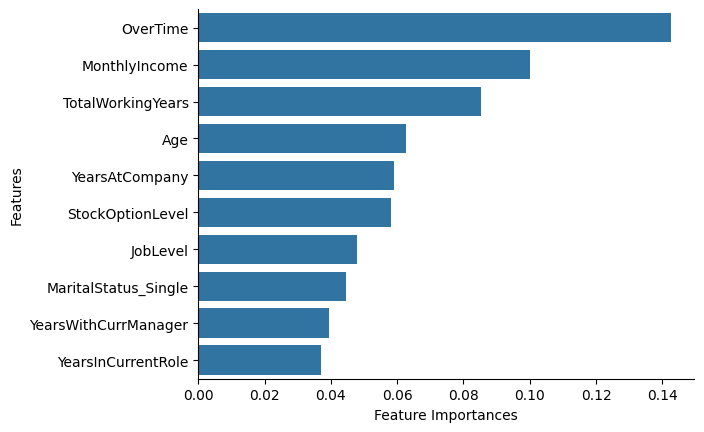

In [98]:
feature = rfc.feature_importances_
feature_importances = pd.Series(feature, index=X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
sns.despine()
plt.xlabel("Feature Importances")
plt.ylabel("Features")